# Mount Google Drive and Set Path

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from collections import Counter

# Define path
base_dir = '/content/drive/MyDrive/Assessment/Assessment_1/dataset'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')


# Set Parameters and Create Data Generators

In [ ]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# No augmentation
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load images
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


Found 6218 images belonging to 4 classes.
Found 1553 images belonging to 4 classes.


# Visualize Sample Images

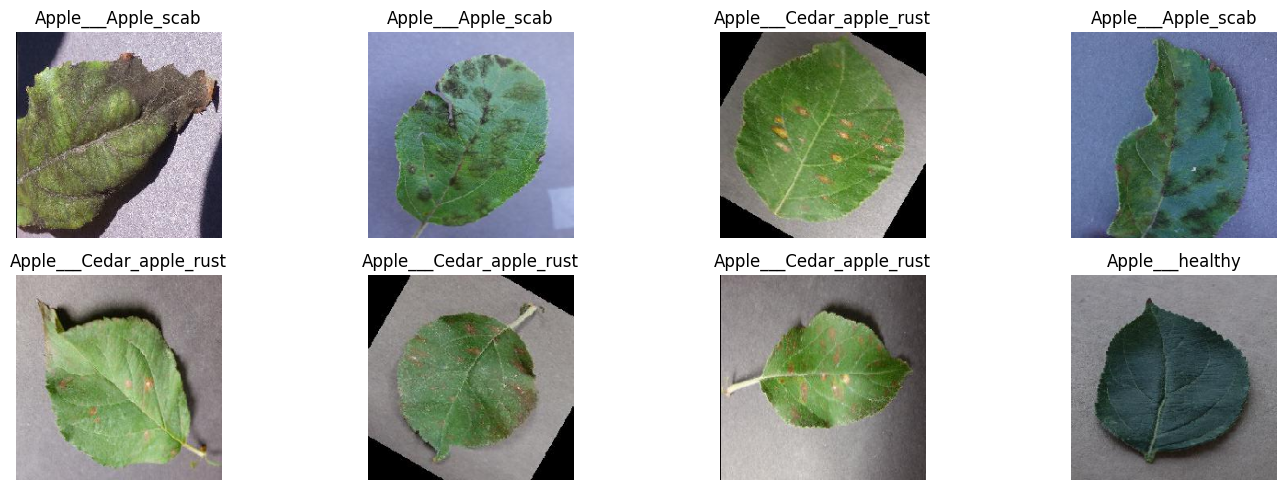

In [ ]:
def plot_images(generator, class_indices, num_images=8):
    class_names = list(class_indices.keys())
    x_batch, y_batch = next(generator)
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        ax = plt.subplot(2, 4, i + 1)
        plt.imshow(x_batch[i])
        label_index = np.argmax(y_batch[i])
        plt.title(class_names[label_index])
        plt.axis("off")
    plt.tight_layout()
    plt.show()

plot_images(train_generator, train_generator.class_indices)


# Dataset Analysis

In [ ]:
# Count total images per class
def count_images(directory):
    class_counts = {}
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            class_counts[class_name] = len(os.listdir(class_path))
    return class_counts

train_counts = count_images(train_dir)
test_counts = count_images(test_dir)

print("Train Class Distribution:", train_counts)
print("Test Class Distribution:", test_counts)
print("Total training images:", sum(train_counts.values()))
print("Total testing images:", sum(test_counts.values()))


Train Class Distribution: {'Apple___healthy': 1607, 'Apple___Cedar_apple_rust': 1408, 'Apple___Black_rot': 1590, 'Apple___Apple_scab': 1613}
Test Class Distribution: {'Apple___healthy': 401, 'Apple___Cedar_apple_rust': 352, 'Apple___Black_rot': 397, 'Apple___Apple_scab': 403}
Total training images: 6218
Total testing images: 1553


We split the dataset into training and testing sets in a folder-based format. A standard 80/20 split is often applied to ensure sufficient data for training while retaining a portion for unbiased evaluation.**bold text**

# Class Distribution Histogram

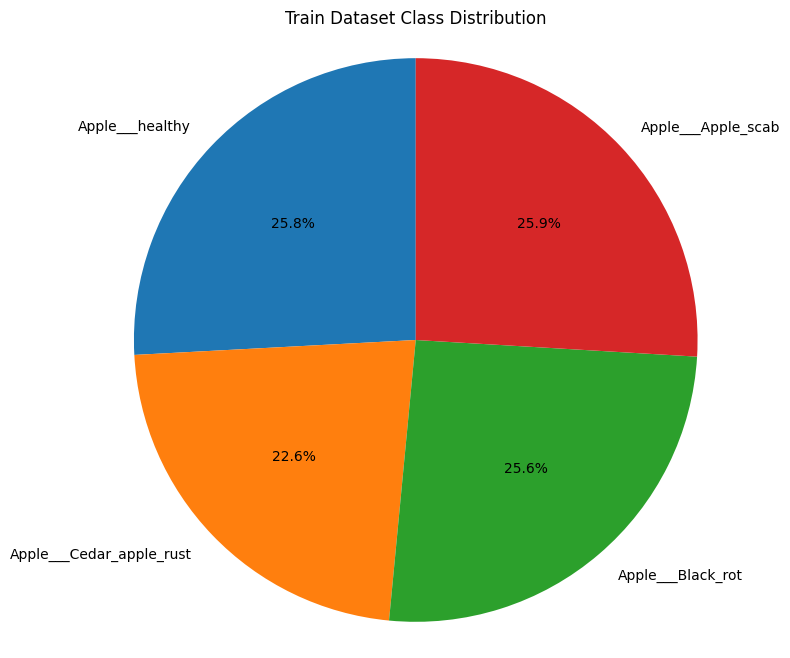

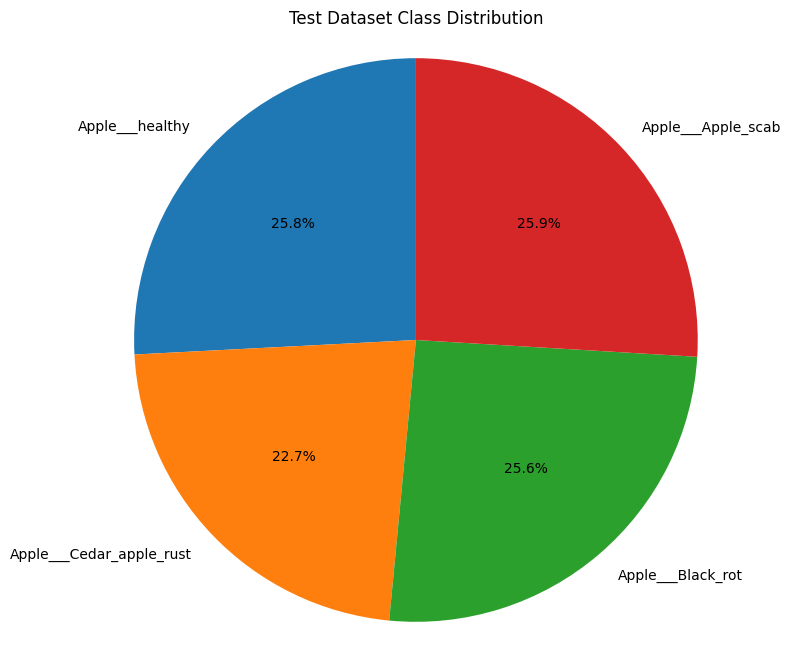

In [ ]:
import matplotlib.pyplot as plt

def plot_pie_chart(counts, title):
    labels = list(counts.keys())
    sizes = list(counts.values())
    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title(title)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

plot_pie_chart(train_counts, "Train Dataset Class Distribution")
plot_pie_chart(test_counts, "Test Dataset Class Distribution")


# Bar Plot for Class-wise Image Counts

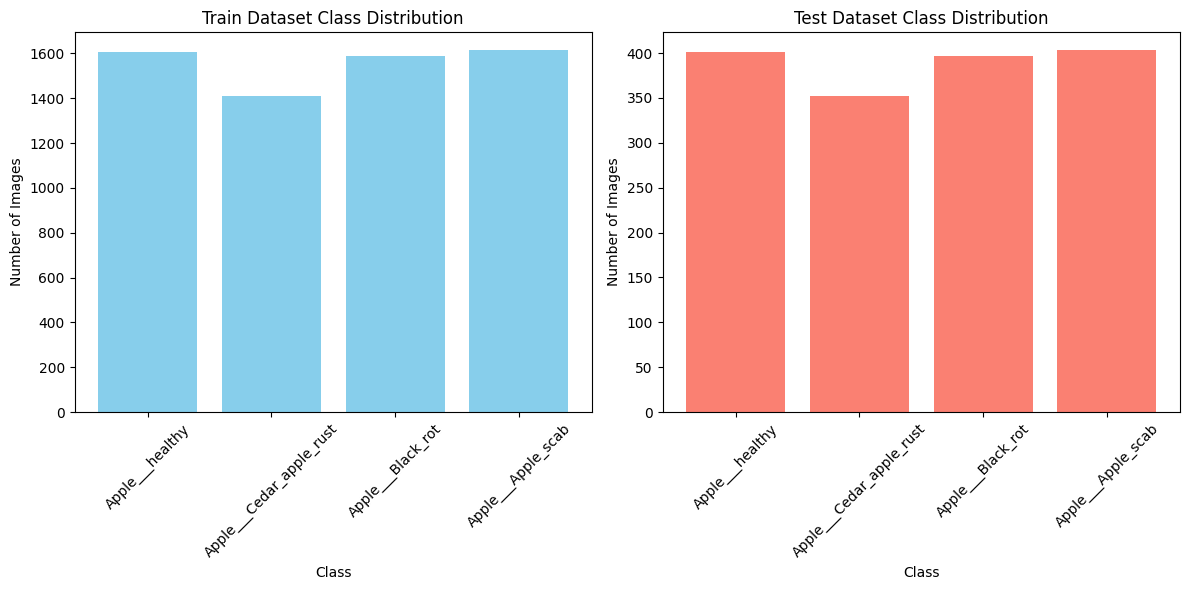

In [ ]:
# Plot class distribution using bar charts
plt.figure(figsize=(12, 6))

# Train dataset bar plot
plt.subplot(1, 2, 1)
plt.bar(train_counts.keys(), train_class_counts, color='skyblue')
plt.title("Train Dataset Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)

# Test dataset bar plot
plt.subplot(1, 2, 2)
plt.bar(test_counts.keys(), test_class_counts, color='salmon')
plt.title("Test Dataset Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Filter
A filter (or feature detector) refers to the set of values (weights) that are applied to the input data during the convolution process.

Kernel
A kernel is the actual matrix (the set of weights) that is used to perform the convolution operation on the input image. It is typically smaller than the image (e.g., a 3x3 or 5x5 matrix)

# Build the Baseline CNN Architecture

Convolutional Layer: Extracts local features using filters.
Activation Layer (ReLU): Introduces non-linearity.
Pooling Layer: Reduces spatial dimensions and retains essential features.
Flatten Layer: Converts 2D feature maps into 1D vectors.
Fully Connected Layer: Learns high-level features for classification or regression.
Dropout Layer: Prevents overfitting by randomly deactivating neurons.
Batch Normalization: Normalizes layer inputs for more stable training.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Build the model
model = Sequential() #This initializes a Sequential model

# Convolutional Layer 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3))) #32 is number of filter
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 2
model.add(Conv2D(64, (3, 3), activation='relu')) #(3, 3): The size of each filter (kernel)
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer
model.add(Flatten())
#flatten the multi-dimensional output from the previous layer (typically the 2D feature maps after convolution and pooling) into a 1D vector.
# Fully connected layers
model.add(Dense(512, activation='relu')) #learns the feature
model.add(Dropout(0.5))  # Dropout to prevent overfitting
model.add(Dense(256, activation='relu'))
model.add(Dense(4, activation='softmax'))  # 4 classes

# Model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │    44,302,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,528,452 (169.86 MB)

 Trainable params: 44,528,452 (169.86 MB)

 Non-trainable params: 0 (0.00 B)

 A Sequential model is a linear stack of layers where each layer has exactly one input and one output


# Compile the Model

In [ ]:
# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Model

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 4867s 25s/step - accuracy: 0.6507 - loss: 0.8926 - val_accuracy: 0.9118 - val_loss: 0.2525
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 37s 190ms/step - accuracy: 0.8997 - loss: 0.2961 - val_accuracy: 0.9324 - val_loss: 0.1917
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 34s 174ms/step - accuracy: 0.9277 - loss: 0.1924 - val_accuracy: 0.9266 - val_loss: 0.2222
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 40s 168ms/step - accuracy: 0.9505 - loss: 0.1561 - val_accuracy: 0.9562 - val_loss: 0.1291
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 42s 174ms/step - accuracy: 0.9631 - loss: 0.1060 - val_accuracy: 0.9491 - val_loss: 0.1510
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 33s 168ms/step - accuracy: 0.9684 - loss: 0.0886 - val_accuracy: 0.9427 - val_loss: 0.1875
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 37s 188ms/step - accuracy: 0.9804 - loss: 0.0586 - val_accuracy: 0.9575 - val_loss: 0.1162
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 32s 165ms/step - accuracy: 0.9835 - loss: 0

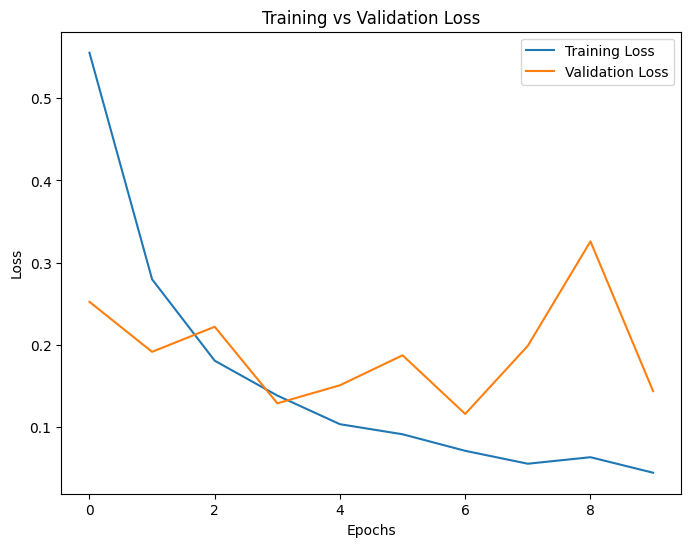

In [ ]:
history = model.fit(
    train_generator,
    epochs=10,  # Adjust as necessary
    validation_data=test_generator,
    verbose=1 #This controls how much information is shown during training.
)

# Plotting training & validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Evaluate the Model

In [ ]:
from sklearn.metrics import classification_report

# Get predictions
predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)  #picks the class with the highest probability for each image.
y_true = test_generator.classes

# Print classification report
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 141ms/step
                          precision    recall  f1-score   support

      Apple___Apple_scab       0.98      0.90      0.94       403
       Apple___Black_rot       0.93      0.99      0.96       397
Apple___Cedar_apple_rust       0.97      1.00      0.98       352
         Apple___healthy       0.98      0.97      0.97       401

                accuracy                           0.96      1553
               macro avg       0.96      0.97      0.96      1553
            weighted avg       0.96      0.96      0.96      1553



Precision measures the accuracy of positive predictions.
Recall measures how well the model identifies actual positive instances.
F1-Score is the harmonic mean of precision and recall.

# Visualize Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 936ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


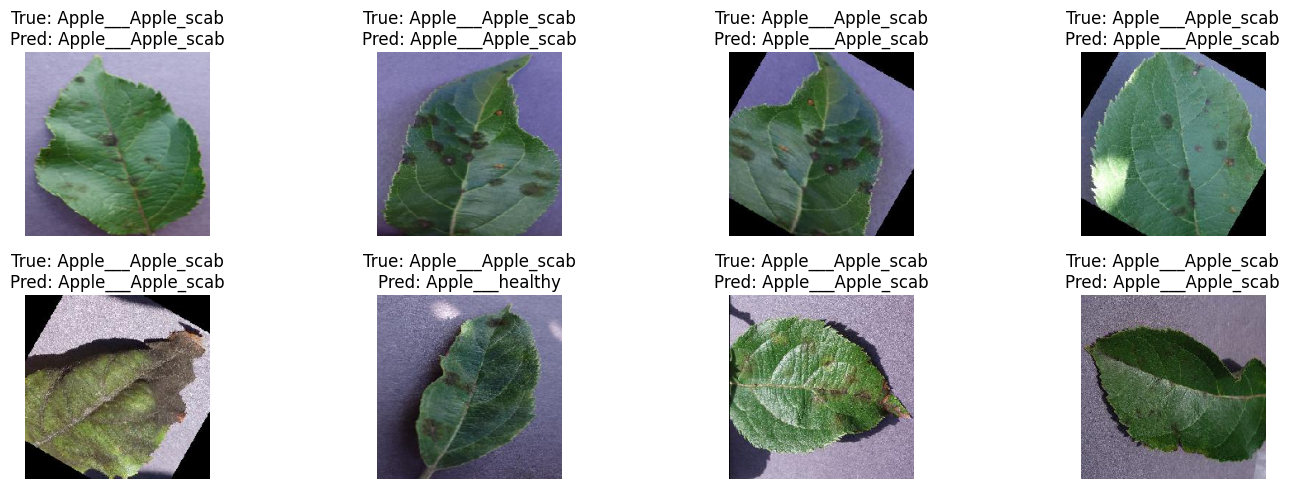

In [ ]:
def plot_predictions(generator, model, num_images=8):
    class_names = list(generator.class_indices.keys())
    x_batch, y_batch = next(generator)
    plt.figure(figsize=(15, 5))

    for i in range(num_images):
        ax = plt.subplot(2, 4, i + 1)
        plt.imshow(x_batch[i])
        predicted_class = class_names[np.argmax(model.predict(x_batch[i:i+1]))]
        true_class = class_names[np.argmax(y_batch[i])]
        plt.title(f"True: {true_class}\nPred: {predicted_class}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

plot_predictions(test_generator, model)


batch normalization is normalizes the inputs to each layer of the network. This means it adjusts the data so that each input has a mean of 0 and a variance of 1. This makes the training process smoother and faster.

# Build the Deeper Model

In [ ]:
from tensorflow.keras.layers import BatchNormalization

# Build deeper model
model_deeper = Sequential()

# Convolutional Layer 1
model_deeper.add(Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model_deeper.add(BatchNormalization())  # Batch normalization
model_deeper.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 2
model_deeper.add(Conv2D(128, (3, 3), activation='relu'))
model_deeper.add(BatchNormalization())
model_deeper.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 3
model_deeper.add(Conv2D(256, (3, 3), activation='relu'))
model_deeper.add(BatchNormalization())
model_deeper.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 4 (Added layer)
model_deeper.add(Conv2D(512, (3, 3), activation='relu'))
model_deeper.add(BatchNormalization())
model_deeper.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 5 (Added layer)
model_deeper.add(Conv2D(512, (3, 3), activation='relu'))
model_deeper.add(BatchNormalization())
model_deeper.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer
model_deeper.add(Flatten())

# Fully connected layers
model_deeper.add(Dense(1024, activation='relu'))
model_deeper.add(Dropout(0.5))  # Dropout for regularization
model_deeper.add(Dense(512, activation='relu'))
model_deeper.add(Dense(4, activation='softmax'))  # 4 classes
#decreasing will neurons to 64, you are decreasing the model's capacity.
# Model summary
model_deeper.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 109, 109, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 52, 52, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 26, 26, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 24, 24, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 24, 24, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 10, 10, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 10, 10, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 5, 5, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1024)           │    13,108,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,551,748 (66.95 MB)

 Trainable params: 17,548,804 (66.94 MB)

 Non-trainable params: 2,944 (11.50 KB)

# Compile the Model

In [ ]:
# Compile the deeper model
model_deeper.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


# Train the Deeper Model

Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 69s 263ms/step - accuracy: 0.6703 - loss: 3.8081 - val_accuracy: 0.2267 - val_loss: 5.7863
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 36s 186ms/step - accuracy: 0.8610 - loss: 0.4941 - val_accuracy: 0.3857 - val_loss: 7.5842
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 38s 194ms/step - accuracy: 0.9216 - loss: 0.2724 - val_accuracy: 0.4630 - val_loss: 2.4190
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 36s 185ms/step - accuracy: 0.9310 - loss: 0.2050 - val_accuracy: 0.9575 - val_loss: 0.1244
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 36s 184ms/step - accuracy: 0.9500 - loss: 0.1476 - val_accuracy: 0.8976 - val_loss: 0.2571
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 36s 181ms/step - accuracy: 0.9663 - loss: 0.1046 - val_accuracy: 0.9272 - val_loss: 0.2674
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 36s 185ms/step - accuracy: 0.9709 - loss: 0.0861 - val_accuracy: 0.7064 - val_loss: 1.3771
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 36s 182ms/step - accuracy: 0.9645 - loss: 0

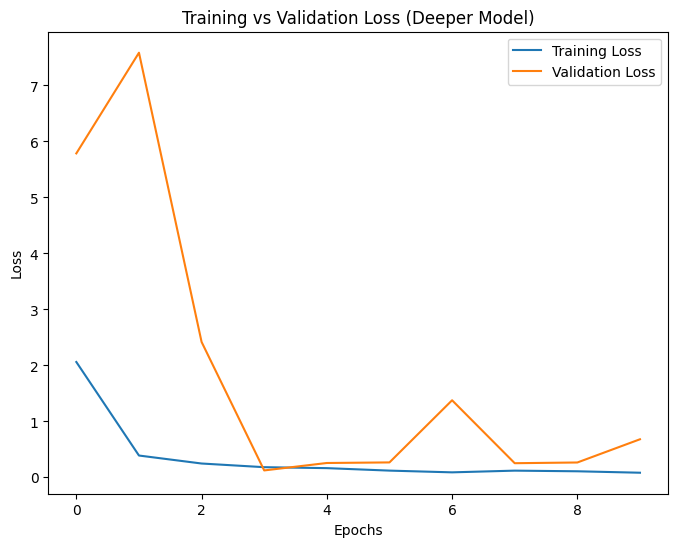

In [ ]:
history_deeper = model_deeper.fit(
    train_generator,
    epochs=10,  # Adjust as necessary
    validation_data=test_generator,
    verbose=1 #This controls how much information is shown during training
)

# Plotting training & validation loss for deeper model
plt.figure(figsize=(8, 6))
plt.plot(history_deeper.history['loss'], label='Training Loss')
plt.plot(history_deeper.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss (Deeper Model)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Evaluate the Deeper Model

In [ ]:
# Get predictions from deeper model
predictions_deeper = model_deeper.predict(test_generator)
y_pred_deeper = np.argmax(predictions_deeper, axis=1)

# Print classification report
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred_deeper, target_names=test_generator.class_indices.keys()))


49/49 ━━━━━━━━━━━━━━━━━━━━ 8s 144ms/step
                          precision    recall  f1-score   support

      Apple___Apple_scab       0.75      0.95      0.84       403
       Apple___Black_rot       0.96      0.99      0.98       397
Apple___Cedar_apple_rust       0.84      0.82      0.83       352
         Apple___healthy       0.97      0.70      0.81       401

                accuracy                           0.87      1553
               macro avg       0.88      0.87      0.87      1553
            weighted avg       0.88      0.87      0.87      1553



# Visualize Predictions from the Deeper Model

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


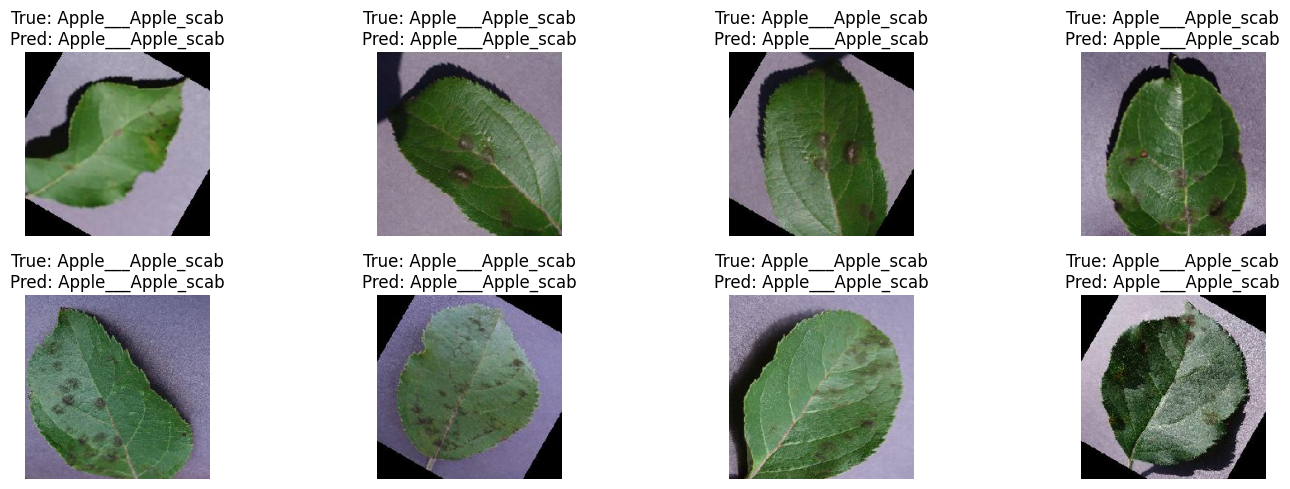

In [ ]:
plot_predictions(test_generator, model_deeper)


# Comparative Analysis of Baseline vs. Deeper Model



# Model Performance Comparison

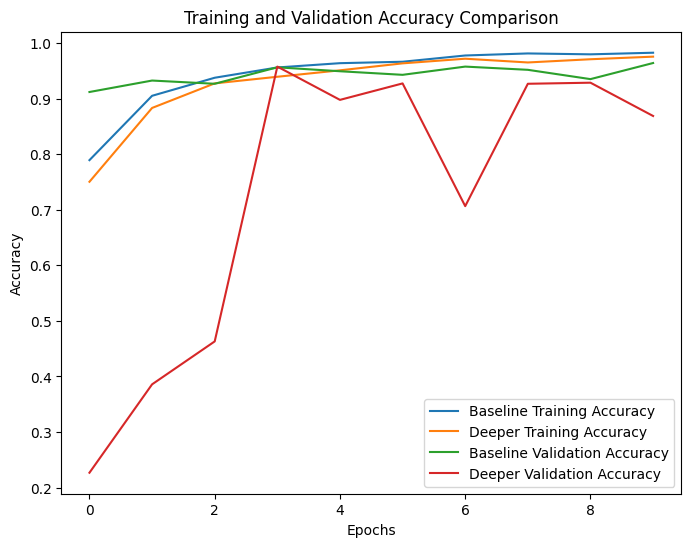

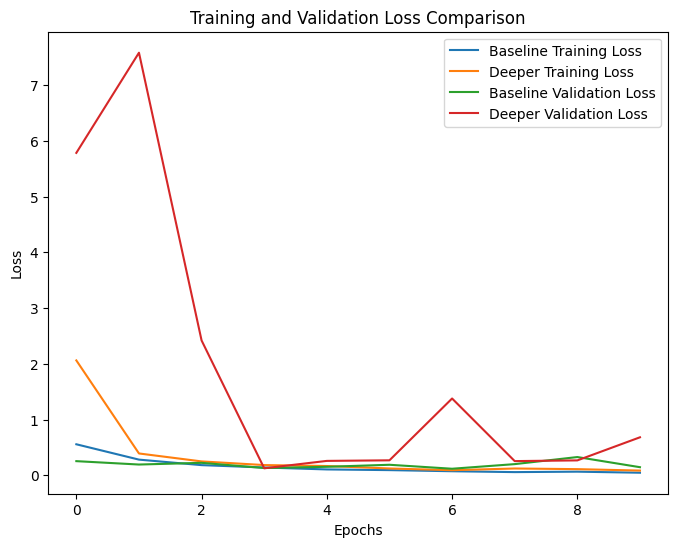

In [ ]:
# Compare accuracy and loss for baseline and deeper models
baseline_history = history.history
deeper_history = history_deeper.history

# Plot accuracy comparison
plt.figure(figsize=(8, 6))
plt.plot(baseline_history['accuracy'], label='Baseline Training Accuracy')
plt.plot(deeper_history['accuracy'], label='Deeper Training Accuracy')
plt.plot(baseline_history['val_accuracy'], label='Baseline Validation Accuracy')
plt.plot(deeper_history['val_accuracy'], label='Deeper Validation Accuracy')
plt.title('Training and Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss comparison
plt.figure(figsize=(8, 6))
plt.plot(baseline_history['loss'], label='Baseline Training Loss')
plt.plot(deeper_history['loss'], label='Deeper Training Loss')
plt.plot(baseline_history['val_loss'], label='Baseline Validation Loss')
plt.plot(deeper_history['val_loss'], label='Deeper Validation Loss')
plt.title('Training and Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Computational Efficiency Comparison

# Optimizer Comparison (SGD vs Adam)

Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 43s 199ms/step - accuracy: 0.9754 - loss: 0.0951 - val_accuracy: 0.9762 - val_loss: 0.0777
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 35s 180ms/step - accuracy: 0.9844 - loss: 0.0488 - val_accuracy: 0.9453 - val_loss: 0.1615
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 42s 183ms/step - accuracy: 0.9873 - loss: 0.0430 - val_accuracy: 0.9337 - val_loss: 0.2481
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 35s 180ms/step - accuracy: 0.9890 - loss: 0.0410 - val_accuracy: 0.8873 - val_loss: 0.7214
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 36s 181ms/step - accuracy: 0.9895 - loss: 0.0300 - val_accuracy: 0.9794 - val_loss: 0.0684
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 35s 180ms/step - accuracy: 0.9911 - loss: 0.0282 - val_accuracy: 0.9446 - val_loss: 0.2034
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 44s 198ms/step - accuracy: 0.9875 - loss: 0.0314 - val_accuracy: 0.9472 - val_loss: 0.1928
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 36s 184ms/step - accuracy: 0.9896 - loss: 0

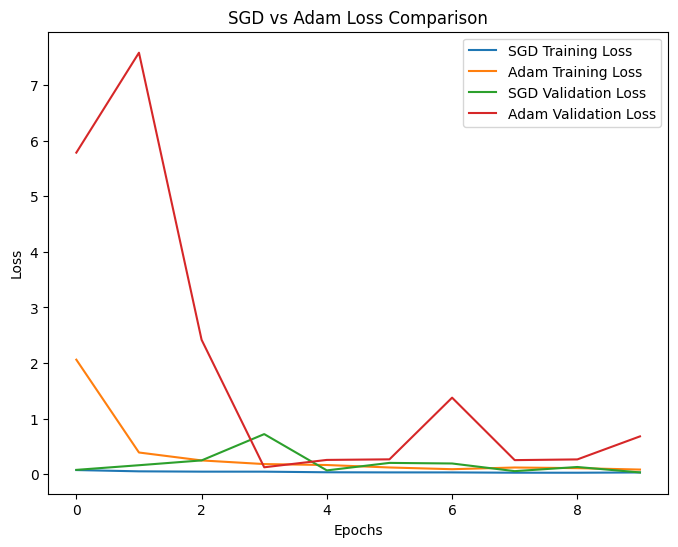

In [ ]:
# Compile model with SGD optimizer
model_deeper.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Train with SGD learning rate is 0.01 meanwhile adam is 0.0005
history_sgd = model_deeper.fit(
    train_generator,
    epochs=10, #one complete pass through the entire training dataset during the training process of a model
    validation_data=test_generator,
    verbose=1
)

# Plot SGD vs Adam Loss
plt.figure(figsize=(8, 6))
plt.plot(history_sgd.history['loss'], label='SGD Training Loss')
plt.plot(deeper_history['loss'], label='Adam Training Loss')
plt.plot(history_sgd.history['val_loss'], label='SGD Validation Loss')
plt.plot(deeper_history['val_loss'], label='Adam Validation Loss')
plt.title('SGD vs Adam Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Loading and Adapting a Pre-Trained Model

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load VGG16 with pre-trained ImageNet weights, without the top fully connected layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
#will only retain the convolutional layers and pooling layers, which are responsible for feature extraction.
# Freeze the base model (so the weights won't be updated during training)
for layer in base_model.layers:
    layer.trainable = False

# Add a custom top layer for your classification task
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Pooling layer to reduce dimensionality
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)  # Regularization
x = Dense(4, activation='softmax')(x)  # 4 classes for classification

# Create the final model
model_transfer = Model(inputs=base_model.input, outputs=x)

# Compile the model
model_transfer.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model_transfer.summary()
#Adam(learning_rate=0.0005)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "functional_42"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 4)              │         4,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,244,100 (58.15 MB)

 Trainable params: 529,412 (2.02 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

# Training Strategies

Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 70s 287ms/step - accuracy: 0.6281 - loss: 0.9107 - val_accuracy: 0.9369 - val_loss: 0.2571
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 55s 212ms/step - accuracy: 0.9059 - loss: 0.2711 - val_accuracy: 0.9530 - val_loss: 0.1745
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 82s 210ms/step - accuracy: 0.9387 - loss: 0.1827 - val_accuracy: 0.9285 - val_loss: 0.1740
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 40s 206ms/step - accuracy: 0.9494 - loss: 0.1472 - val_accuracy: 0.9292 - val_loss: 0.1855
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 40s 206ms/step - accuracy: 0.9425 - loss: 0.1556 - val_accuracy: 0.9491 - val_loss: 0.1337
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 40s 206ms/step - accuracy: 0.9548 - loss: 0.1327 - val_accuracy: 0.9575 - val_loss: 0.1086
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 40s 205ms/step - accuracy: 0.9632 - loss: 0.1091 - val_accuracy: 0.9762 - val_loss: 0.0864
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 41s 206ms/step - accuracy: 0.9691 - loss: 0

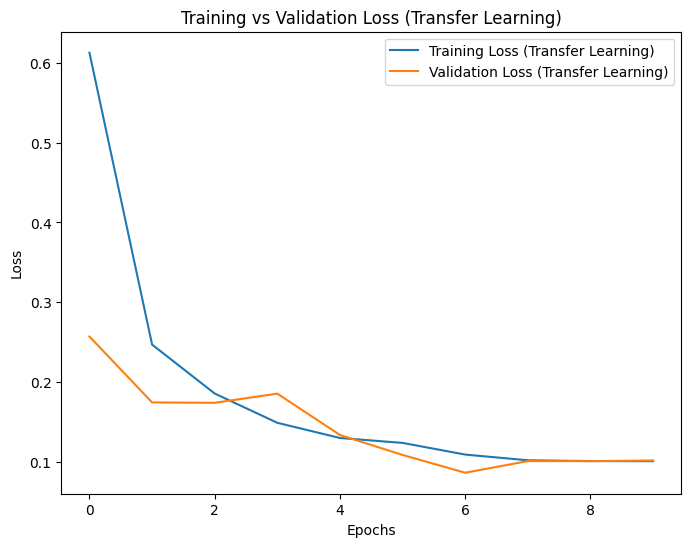

In [ ]:
# Train only the custom top layers
history_transfer = model_transfer.fit(
    train_generator,
    epochs=10,  # You can adjust this based on training time
    validation_data=test_generator,
    verbose=1 #This controls the level of logging output during training
)

# Plot training vs validation loss for transfer learning
plt.figure(figsize=(8, 6))
plt.plot(history_transfer.history['loss'], label='Training Loss (Transfer Learning)')
plt.plot(history_transfer.history['val_loss'], label='Validation Loss (Transfer Learning)')
plt.title('Training vs Validation Loss (Transfer Learning)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Model Evaluation and Prediction

In [ ]:
# Get predictions from the transfer learning model
predictions_transfer = model_transfer.predict(test_generator)
y_pred_transfer = np.argmax(predictions_transfer, axis=1)

# Print classification report for transfer learning model
print(classification_report(y_true, y_pred_transfer, target_names=test_generator.class_indices.keys()))


49/49 ━━━━━━━━━━━━━━━━━━━━ 10s 184ms/step
                          precision    recall  f1-score   support

      Apple___Apple_scab       0.99      0.87      0.92       403
       Apple___Black_rot       0.97      0.99      0.98       397
Apple___Cedar_apple_rust       0.93      0.99      0.96       352
         Apple___healthy       0.94      0.99      0.96       401

                accuracy                           0.96      1553
               macro avg       0.96      0.96      0.96      1553
            weighted avg       0.96      0.96      0.96      1553



# ROC curve (Receiver Operating Characteristic curve)

49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 126ms/step
49/49 ━━━━━━━━━━━━━━━━━━━━ 8s 146ms/step
49/49 ━━━━━━━━━━━━━━━━━━━━ 9s 173ms/step


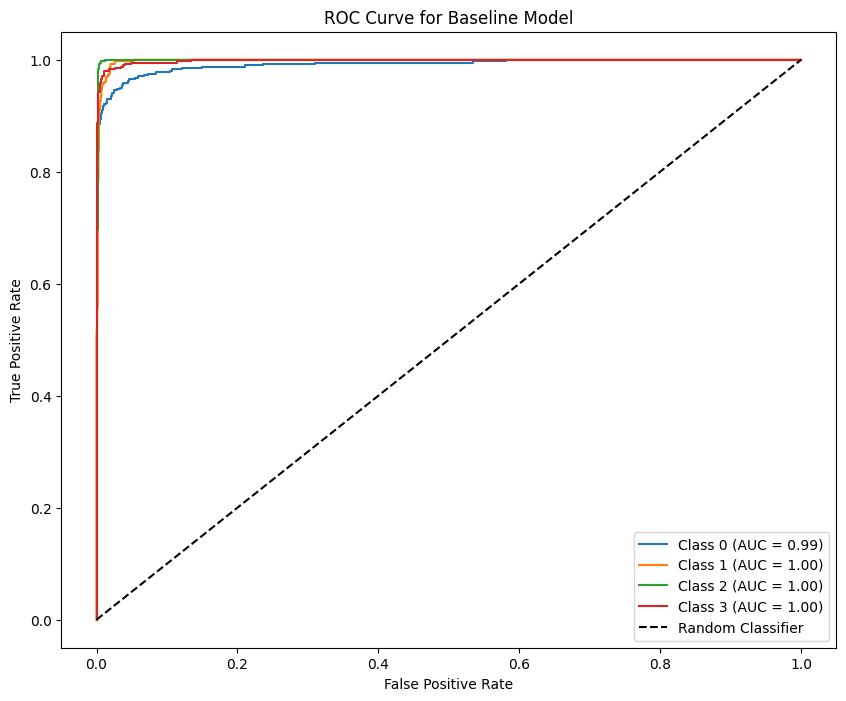

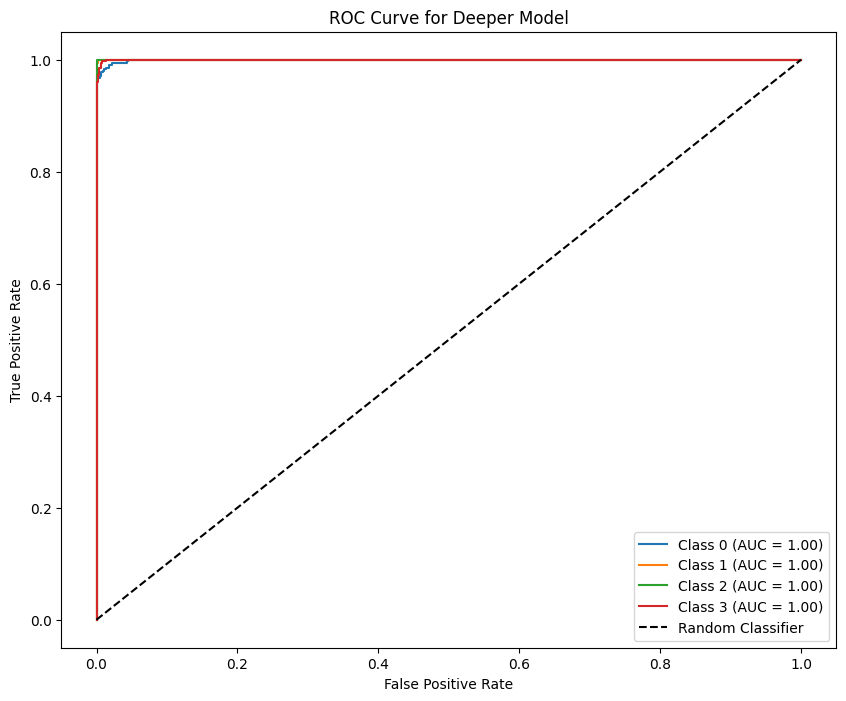

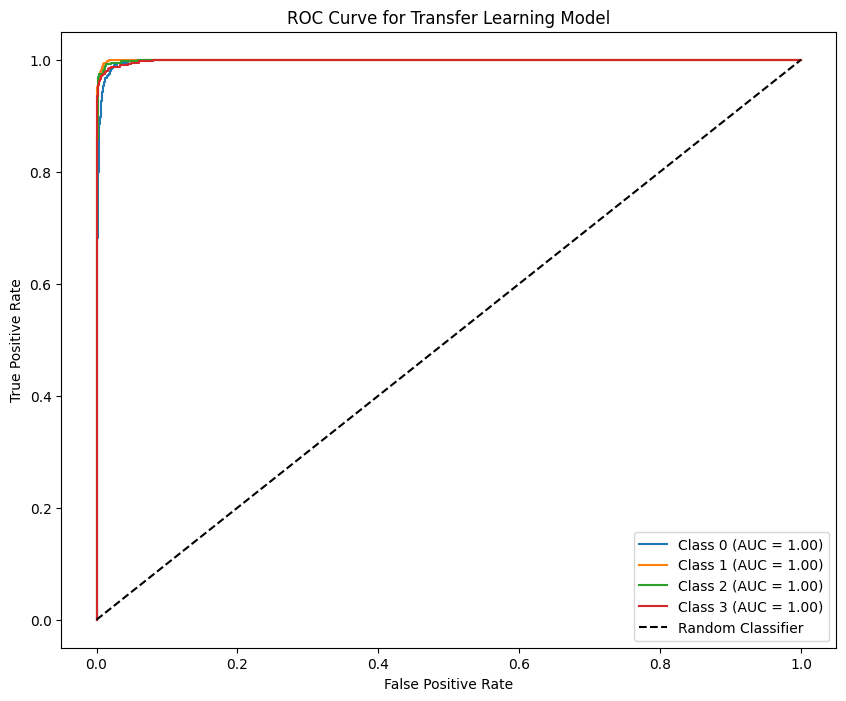

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the true labels (multi-class one-hot encoding)
y_true_binarized = label_binarize(y_true, classes=[0, 1, 2, 3])

# Function to plot the ROC curve for each class
def plot_roc_curve(y_true, y_pred_prob, model_name):
    n_classes = y_true.shape[1]  # Number of classes
    fpr, tpr, auc_scores = {}, {}, {}

    # Plot ROC curve for each class
    plt.figure(figsize=(10, 8))

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred_prob[:, i])  # Get FPR, TPR for class i
        auc_scores[i] = auc(fpr[i], tpr[i])  # Calculate AUC for each class
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {auc_scores[i]:.2f})')

    # Plot a random classifier (diagonal line)
    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

    plt.title(f'ROC Curve for {model_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='best')
    plt.show()

# Get predicted probabilities for each model (probabilities for each class)
y_pred_baseline_prob = model.predict(test_generator)
y_pred_deeper_prob = model_deeper.predict(test_generator)
y_pred_transfer_prob = model_transfer.predict(test_generator)

# Plot ROC curve for each model
plot_roc_curve(y_true_binarized, y_pred_baseline_prob, 'Baseline Model')
plot_roc_curve(y_true_binarized, y_pred_deeper_prob, 'Deeper Model')
plot_roc_curve(y_true_binarized, y_pred_transfer_prob, 'Transfer Learning Model')


The ROC curve plots the True Positive Rate (TPR) (on the Y-axis) against the False Positive Rate (FPR) (on the X-axis) for different thresholds. that quantifies the overall ability of the model to distinguish between positive and negative classes.